<center>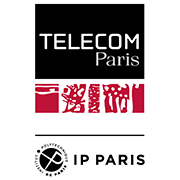</center>

<h1><center><strong><font color="green">IA 717: CHAI & bias: linguistics of AI ethics charters & manifestos</font></strong></center></h1>
<h3><center><font color="blue"><strong>Student Version</strong></font></center></h3>

<center>
<h3> Project Supervisor <br/> <a>Maria Boritchev</a></h3>
<email>maria.boritchev@telecom-paris.fr</email>
<br/>

Year 2025-2026
</center>

------------------------

# <font color="green">**Context and objectives**</font>

> The recent years have seen a surge of initiatives with the goal of defining what “ethical” artificial intelligence would or should entail, resulting in the publication of various charters and manifestos discussing AI ethics; these documents originate from academia, AI industry companies, non-profits, regulatory institutions, and the civil society. The contents of such documents vary wildly, from short, vague position statements to verbatims of democratic debates or impact assessment studies. As such, they are a marker of the social world of artificial intelligence, outlining the tenets of different actors, the consensus and dissensus on important goals, and so on. <a href="https://mapaie.telecom-paris.fr/mapaie-paper.pdf">Mapping AI Ethics: a meso-scale analysis of its charters and manifestos, M. Gornet et al, 2024.</a>

The objective of this project to study the linguistic specificities of a corpus of charters and manifestos of AI ethics, called ```MapAIE```. We will study the semantic structure of sentences from MapAIE using the Abstract Meaning Representation (<a href="https://github.com/amrisi/amr-guidelines/blob/master/amr.md">AMR</a>) abstraction method. In particular, we will focus on the usage and the environment of the term _bias_, in order to see its context and the (possibly different?) meanings associated with its usage.

This project is organised in three subtasks:
1) Data retrieval and exploration.
2) Exploration of the term _bias_ in the data.
3) AMR graphs exploration & exploration of the term _bias_ in AMR graphs.


### <font color="green">Evaluation</font>

The project is evaluated through a presentation with a report and your completed project, documented with a README. Grades will be partly individual and partly collective. 

# <font color="green">**1 - Data Presentation and Retrieval**</font>

Our main corpus is called _MapAIE - Mapping AI Ethics_. It is a collection of 436 common charters and manifestos around artificial intelligence and AI ethics. The corpus' <a href="https://mapaie.telecom-paris.fr/mapaie-datasheet.pdf">datasheet</a> provides detailed information about the collection process and the contents of the corpus. 

<font color="red">1.1 Question:</font> Using the git repository https://gitlab.telecom-paris.fr/tiphaine.viard/mapaie, build the data locally. How many documents are there in the ```./pdf``` folder? in the ```./txt``` folder?

In [81]:
import os

folder = "/home/ambroise012/CHAI-bias/mapaie/data/docs"
nb_docs = len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])

print(nb_docs)

374


In [71]:
import os

folder = "/home/ambroise012/CHAI-bias/mapaie/data/txts"
nb_docs = len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])

print(nb_docs)

372


372 au lieu de 436 et pour cause : certaines pages sont erreur 404 n'existe plus. Il nous manque donc 64 fichiers.

<font color="yellow">1.1 Answer:</font>

If the answer in the previous question is different from 436, reduce the local data by keeping only the documents that should be included in the corpus. These documents are identified in the file `all_manifestos.csv`, these are the documents which state `Included`in the column `Status`. 

In [ ]:
# create new filtered CSV
import pandas as pd

# load CSV
csv_file = "/home/ambroise012/CHAI-bias/mapaie/all_manifestos.csv"
df = pd.read_csv(csv_file)
print(df.shape)

df["Status"] = df["Status"].astype(str).str.strip().str.lower()
df["Label"] = df["Label"].astype(str).str.strip().str.lower()

# 1) Keep line where Status == 'included' or empty
df_filtered = df[(df["Status"] == "included") | (df["Status"] == "")]

print(df_filtered.shape)
print(df_filtered.head())

df_filtered.to_csv("/home/ambroise012/CHAI-bias/mapaie/all_manifestos_filtered.csv", index=False)


Let's explore the data. As you can see, documents in ```./pdf``` folder and documents in the ```./txt``` folder are the same, and the name formatting is such that ```n.txt``` contains plain text extracted from ```n.pdf```.

<font color="red">1.2 Question:</font> Why is it useful to have the data both in .pdf and .txt format? Cite one advantage and one drawback for linguistic analysis for each of the formats.

<font color="orange">1.2 Answer:</font> there are .html and .pdf file -> more general

.pdf preserves the original formatting, layout, fonts, and possibly images/tables. This is valuable for reference and reproducibility.

.txt provides raw text content, which is easier to process computationally for natural language or linguistic analysis.

PDFs preserve context and fidelity to the original document but are hard to process, while plain text is easy to analyze computationally but loses structural richness

We now want to know more about words and key-words used throughout the corpus. There are several terms that are widely used when writing about ethics of AI, and it is interesting from a linguistic point of view to see where and how these words occur. 

<font color="red">1.3 Question:</font> what are the most frequent words, excluding stopwords, in the whole corpus? Please provide visualizations and comment these visualisations.

In [ ]:
import os
import string
from collections import Counter
import matplotlib.pyplot as plt
import nltk

In [72]:
# Load stop words
nltk.download('stopwords')
nltk.download("punkt")

from nltk.corpus import stopwords

# Load txt files
txt_folder = "/home/ambroise012/CHAI-bias/mapaie/data/txts"
# 
corpus_text = ""
for filename in os.listdir(txt_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(txt_folder, filename), "r", encoding="utf-8", errors="ignore") as f:
            corpus_text += f.read().lower() + " "

# Tokenization (remove punctuation, split into words)
tokens = [
    word.strip(string.punctuation)
    for word in corpus_text.split()
    if word.strip(string.punctuation)
]

stop_words = set(stopwords.words("english"))
filtered_tokens = [w for w in tokens if w not in stop_words]

# Count frequencies
word_freq = Counter(filtered_tokens)

top_words = word_freq.most_common(20)
print("Top 20 most frequent words (excluding stopwords):")
for word, freq in top_words:
    print(f"{word}: {freq}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ambroise012/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/ambroise012/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 20 most frequent words (excluding stopwords):
ai: 74923
data: 43885
e: 38047
​: 33697
n: 24029
r: 21903
systems: 17810
use: 17448
c: 16811
human: 15647
intelligence: 14875
l: 14343
also: 14270
artificial: 13747
public: 12847
rights: 12443
h: 11958
research: 11916
system: 11842
may: 11341


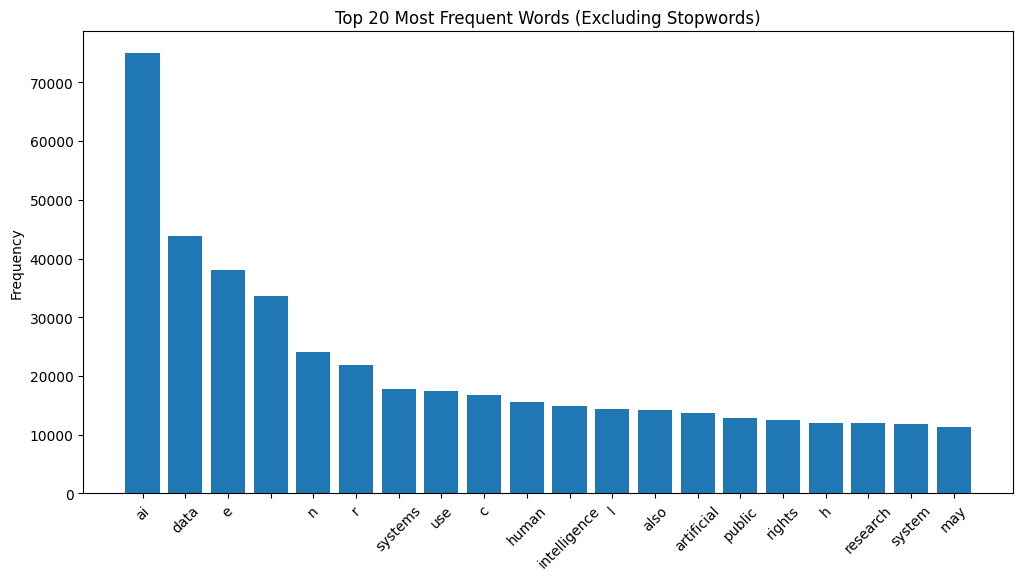

In [74]:
# Bar chart
plt.figure(figsize=(12, 6))
plt.bar([w for w, _ in top_words], [c for _, c in top_words])
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

In [75]:
import re

# Nettoyage + tokenisation robuste
tokens = re.findall(r"\b[a-zA-Z]{2,}\b", corpus_text.lower())

# Supprimer les stopwords
filtered_tokens = [w for w in tokens if w not in stop_words]

# Comptage
word_freq = Counter(filtered_tokens)
top_words = word_freq.most_common(40)

print("Top 20 mots les plus fréquents (sans stopwords):")
for word, freq in top_words:
    print(f"{word}: {freq}")


Top 20 mots les plus fréquents (sans stopwords):
ai: 81287
data: 46810
systems: 18501
use: 17895
human: 17071
intelligence: 16378
artificial: 14990
also: 14283
public: 13372
system: 13112
rights: 13001
https: 12819
research: 12440
digital: 11738
may: 11439
technology: 11187
development: 10915
new: 10366
information: 9981
european: 9980
de: 9648
learning: 9513
used: 8916
technologies: 8863
based: 8803
eu: 8706
law: 8137
could: 7987
work: 7758
color: 7711
et: 7555
impact: 7493
ethical: 7379
decision: 7378
ethics: 7260
machine: 7204
government: 7202
gs: 7195
www: 7138
risk: 7096


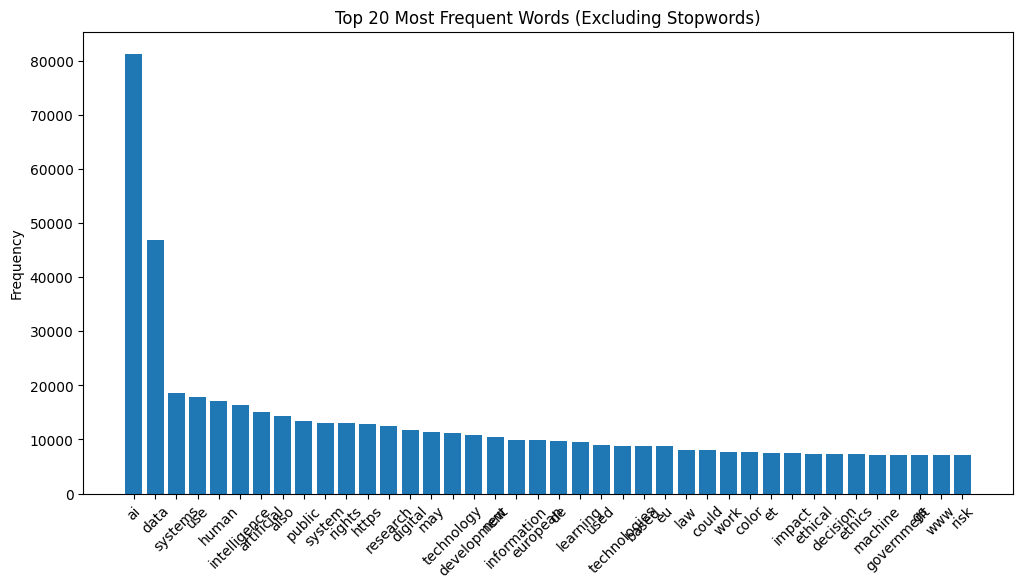

In [76]:
# Bar chart
plt.figure(figsize=(12, 6))
plt.bar([w for w, _ in top_words], [c for _, c in top_words])
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

<font color="orange">1.3 Answer:</font> 

# <font color="green">**2 - Exploration of the term _bias_ in the data**</font>


<font color="orange">2.1 Answer:</font> 

<font color="red">2.2 Question:</font> which are the documents in which the term _bias_ appears the most (top 10% of the corpus)? Please provide a visualization and comment it.

Top 10% of documents with most 'bias' occurrences:
51.txt: 640
273.txt: 500
203.txt: 392
167.txt: 357
270.txt: 239
159.txt: 123
15.txt: 113
16.txt: 94
349.txt: 85
69.txt: 84
400.txt: 80
18.txt: 74
350.txt: 73
37.txt: 73
435.txt: 71
399.txt: 69
186.txt: 68
180.txt: 66
68.txt: 66
336.txt: 66
300.txt: 62
5.txt: 59
223.txt: 56
182.txt: 55
290.txt: 54
359.txt: 54
429.txt: 54
200.txt: 49
427.txt: 48
227.txt: 48
204.txt: 48
81.txt: 48
86.txt: 48
84.txt: 46
39.txt: 46
80.txt: 45
304.txt: 45
293.txt: 45


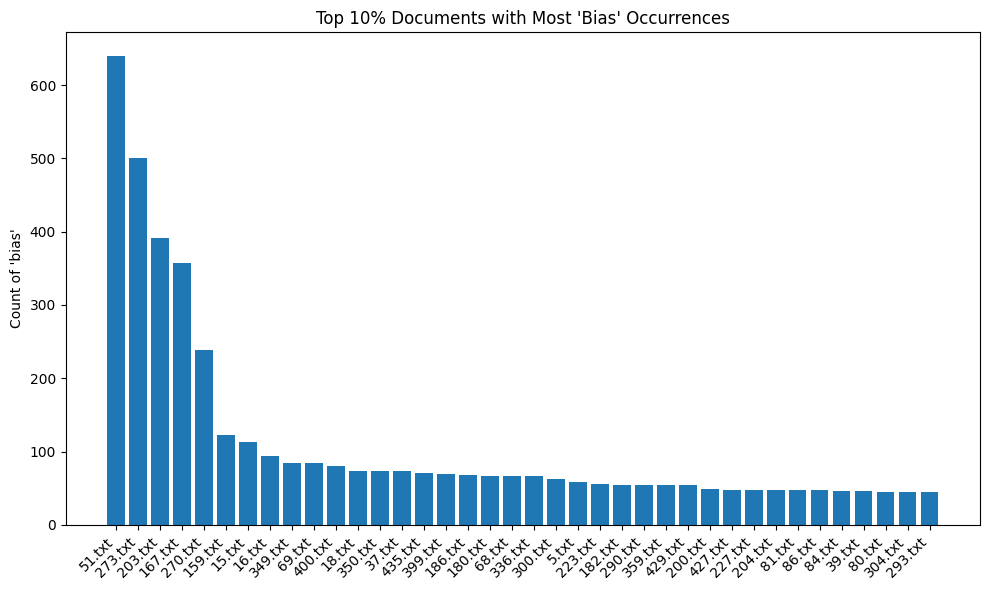

In [77]:
import math 

bias_counts = {}

# Loop through files and count "bias"
for filename in os.listdir(txt_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(txt_folder, filename), "r", encoding="utf-8", errors="ignore") as f:
            text = f.read().lower()
            count = text.count("bias")  # simple occurrence count
            bias_counts[filename] = count

# Sort documents by frequency
sorted_docs = sorted(bias_counts.items(), key=lambda x: x[1], reverse=True)

# Determine top 10% of corpus
top_n = max(1, math.ceil(len(sorted_docs) * 0.1))
top_docs = sorted_docs[:top_n]

print("Top 10% of documents with most 'bias' occurrences:")
for doc, count in top_docs:
    print(f"{doc}: {count}")

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.bar([doc for doc, _ in top_docs], [count for _, count in top_docs])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10% Documents with Most 'Bias' Occurrences")
plt.ylabel("Count of 'bias'")
plt.tight_layout()
plt.show()

<font color="orange">2.2 Answer:</font> 

Now, we want to know more about the context in which the term _bias_ appears in the corpus. 

<font color="red">2.3 Question:</font> Explore the context in which the term _bias_ appears in the documents selected in the previous question (top 10% of the corpus). Please provide a visualisation and comment it.

Hint: you could for example consider n-grams containing _bias_ (but feel free to explore context by other means!)

In [91]:
# extract context around bias
contexts = []
window_size = 3 # word before and after

for doc, _ in top_docs:
    with open(os.path.join(txt_folder, doc), "r", encoding="utf-8", errors="ignore") as f:
        words = [w.strip(string.punctuation) for w in f.read().lower().split()]
        for i, word in enumerate(words):
            if word == "bias":
                left_context = " ".join(words[max(0, i - window_size):i])
                right_context = " ".join(words[i + 1:i + 1 + window_size])
                contexts.append((left_context, "bias", right_context))
ngrams = []
for left, center, right in contexts:
    left_parts = left.split()
    right_parts = right.split()
    if left_parts:
        ngrams.append(f"{left_parts[-1]} bias")   # word before + bias
    if right_parts:
        ngrams.append(f"bias {right_parts[0]}")   # bias + word after

ngram_freq = Counter(ngrams)
top_ngrams = ngram_freq.most_common(27)

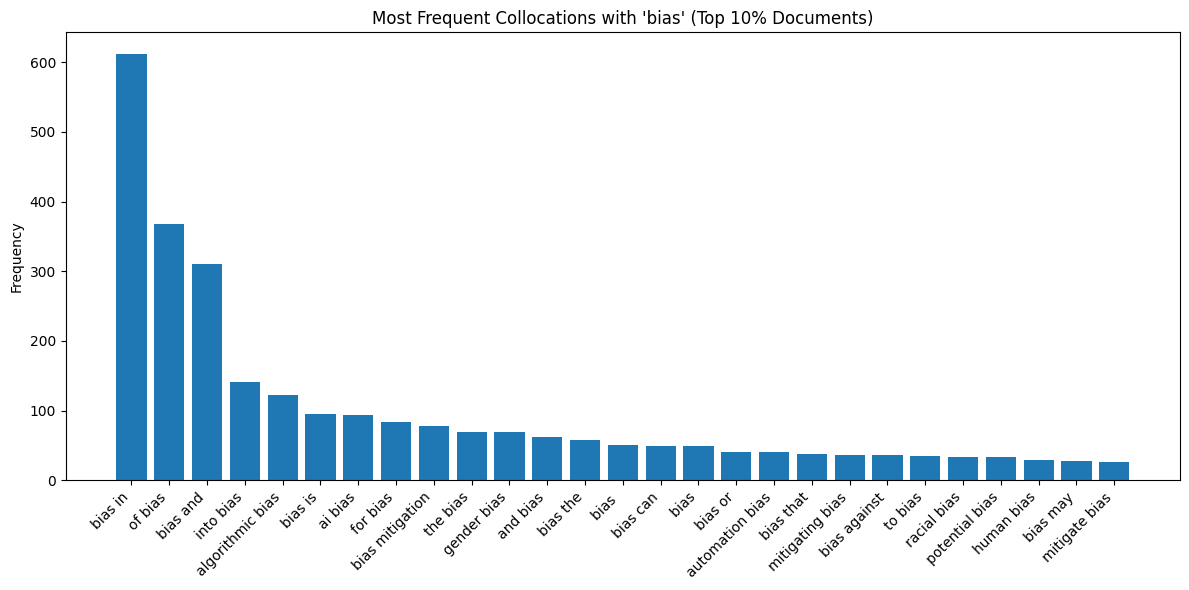

Top collocations with 'bias':
bias in: 612
of bias: 368
bias and: 311
into bias: 141
algorithmic bias: 122
bias is: 95
ai bias: 94
for bias: 84
bias mitigation: 78
the bias: 69
gender bias: 69
and bias: 63
bias the: 58
bias ​: 51
bias can: 50
​ bias: 50
bias or: 41
automation bias: 41
bias that: 38
mitigating bias: 37
bias against: 37
to bias: 35
racial bias: 34
potential bias: 33
human bias: 30
bias may: 28
mitigate bias: 27


In [92]:
plt.figure(figsize=(12, 6))
plt.bar([ng for ng, _ in top_ngrams], [c for _, c in top_ngrams])
plt.xticks(rotation=45, ha="right")
plt.title("Most Frequent Collocations with 'bias' (Top 10% Documents)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("Top collocations with 'bias':")
for ng, freq in top_ngrams:
    print(f"{ng}: {freq}")

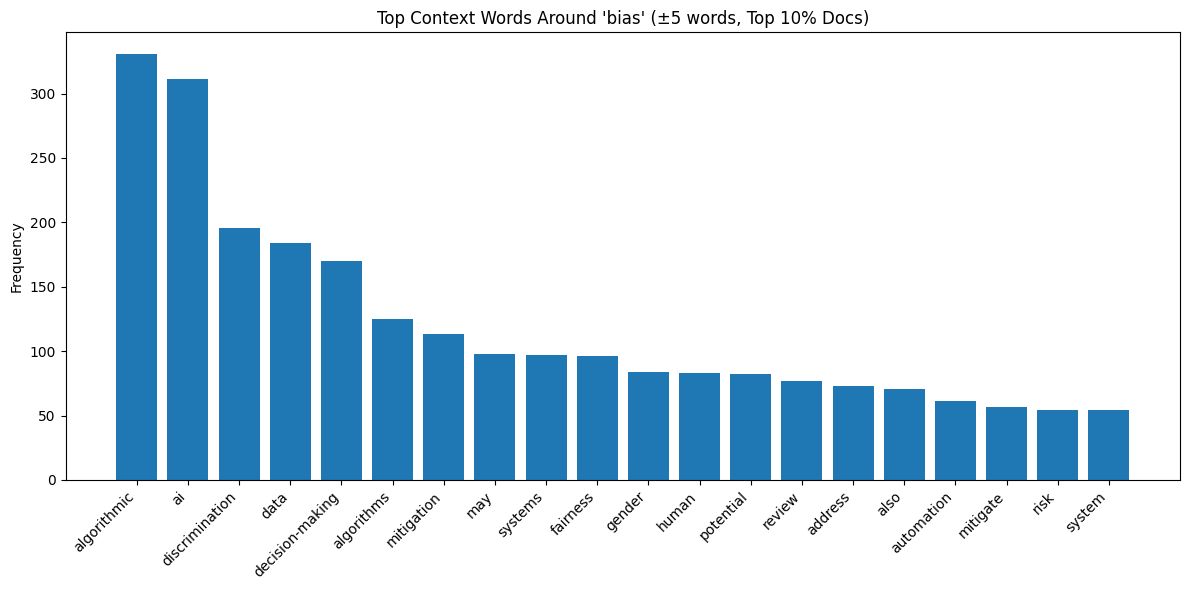

Top 20 context words around 'bias':
algorithmic: 331
ai: 311
discrimination: 196
data: 184
decision-making: 170
algorithms: 125
mitigation: 113
may: 98
systems: 97
fairness: 96
gender: 84
human: 83
potential: 82
review: 77
address: 73
also: 71
automation: 61
mitigate: 57
risk: 54
system: 54


In [ ]:
import unicodedata

window_size = 5
context_words = []

for doc, _ in top_docs:
    with open(os.path.join(txt_folder, doc), "r", encoding="utf-8", errors="ignore") as f:
        # Normalisation Unicode + split
        text = unicodedata.normalize("NFKC", f.read().lower())
        words = [w.strip(string.punctuation + "•") for w in text.split()]
        for i, word in enumerate(words):
            if word == "bias":
                left_context = words[max(0, i - window_size):i]
                right_context = words[i + 1:i + 1 + window_size]
                context_words.extend(left_context + right_context)

# Nettoyage renforcé
context_filtered = []
for w in context_words:
    w = w.strip()
    # Supprime caractères invisibles
    w = "".join(ch for ch in w if not unicodedata.category(ch).startswith("C"))
    if w and w not in stop_words and w != "bias":
        context_filtered.append(w)

context_freq = Counter(context_filtered)
top_context = context_freq.most_common(20)

plt.figure(figsize=(12, 6))
plt.bar([w for w, _ in top_context], [c for _, c in top_context])
plt.title(f"Top Context Words Around 'bias' (±{window_size} words, Top 10% Docs)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("Top 20 context words around 'bias':")
for word, freq in top_context:
    print(f"{word}: {freq}")

1. ai
2. discrimination
3. mitigation
4. fairness
5. gender
6. mitigate
7. racial

<font color="orange">2.3 Answer:</font> 

We will now focus on a sentence-level analysis of our corpus and extract a sub-corpus of sentences that use the word _bias_.

<font color="red">2.4 Question:</font> What information will we lose by focusing on extracted sentences? Please provide three answers.

<font color="orange">2.4 Answer:</font> 

1. context of the sentences/paragraph/file, isolated cause, consequence ; loose connection
2. noisy info, that may found relevant but it's not part of bias (ex: we previously found bias in our study) -> does not give info. Or the word bias can be isolated (such bias, )
3. ... ?

We will definitely loose information, but focusing on a sentence-level analysis gives us access to finer-grained means of linguistic analysis. 

<font color="red">2.5 Question:</font> Extract the _bias-MapAIE_ corpus: a corpus of sentences of MapAIE containing the term _bias_. Organise the data in such a way that, for each sentence, we have:
- the textual content of the sentence;
- the identifier (number) of the document this sentence is extracted from.
How many sentences does the _bias-MapAIE_ corpus contain?

In [1]:
bias_sentences = []

# Loop over each document
for filename in os.listdir(txt_folder):
    if filename.endswith(".txt"):
        doc_id = re.sub(r"\D", "", filename)  # extract number from filename
        with open(os.path.join(txt_folder, filename), "r", encoding="utf-8", errors="ignore") as f:
            text = f.read()
            # Split into sentences
            sentences = nltk.sent_tokenize(text)
            # Keep only those containing "bias"
            for s in sentences:
                if "bias" in s.lower():
                    bias_sentences.append({"doc_id": doc_id, "sentence": s.strip()})

# Convert to DataFrame for organization
bias_df = pd.DataFrame(bias_sentences)

# Display size of bias-MapAIE corpus
print(f"The bias-MapAIE corpus contains {len(bias_df)} sentences.")

# Optional: show first few rows
print(bias_df.head())

# Save corpus to CSV if needed
bias_df.to_csv(
    "bias-MapAIE.csv", 
    index=False, 
    quoting=1,       # 1 = csv.QUOTE_ALL, forces quotes around all fields
    escapechar="\\", # escape special characters
    encoding="utf-8"
)

NameError: name 'os' is not defined

<font color="orange">2.5 Answer:</font> 

## <font color="red">/!\ To do to get data for the rest of the project /!\ </font> 

### Make sure bias-MapAIE is properly extracted and available in the project's git repository. Then, send an email to maria.boritchev@telecom-paris.fr to inform me of the availability of bias-MapAIE so that I can produce data you need for part 3.

We continue by investigating the syntax of sentences. The baseline approach we will use for this part is part-of-speech (POS) tagging: by tagging the elements of sentences by POS, we can investigate the main syntactic roles taken by the term _bias_.

<font color="red">2.6 Question:</font> What are the syntactic roles taken by the term _bias_ in the _bias-MapAIE_ corpus? Please provide a visualization and comment it.

Perform POS tagging on each sentence containing "bias."

Extract the POS tag for the word "bias" in each sentence.

Count the frequency of each POS tag.

Visualize the results using a bar plot.

In [3]:
!pip install pandas nltk matplotlib

  Using cached matplotlib-3.10.6-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.3 MB 11.2 MB/s eta 0:00:01
   --------------- ------------------------ 4.5/11.3 MB 11.2 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.3 MB 10.6 MB/s eta 0:00:01
   --

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


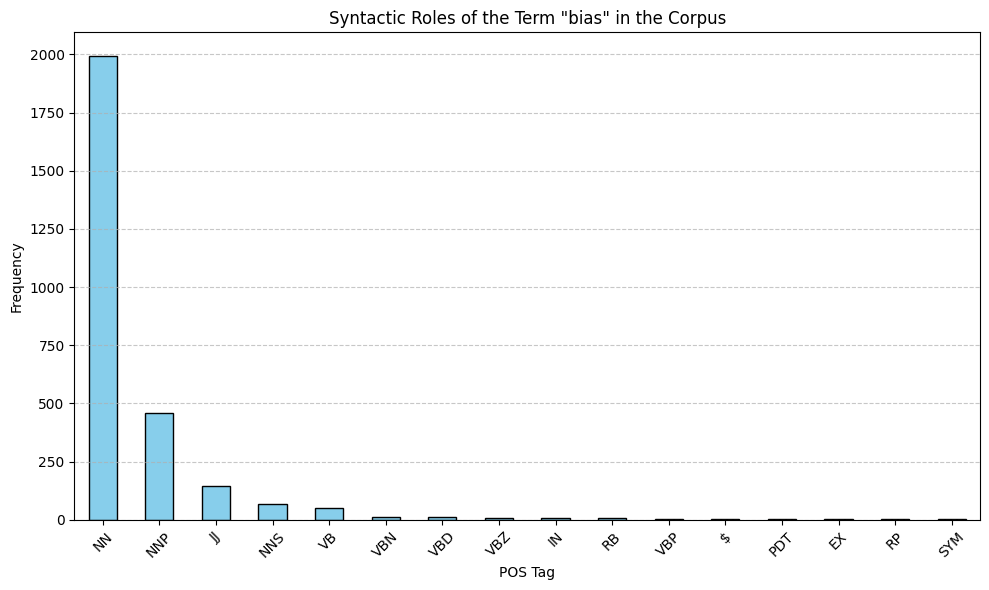

In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

# Load the corpus from the CSV file
bias_df = pd.read_csv('bias-MapAIE.csv')

# Function to extract the POS tag for the word 'bias'
def get_bias_pos(sentence):
    words = word_tokenize(sentence)
    pos_tags = nltk.pos_tag(words)
    for word, tag in pos_tags:
        if word.lower() == 'bias':
            return tag
    return None

# Apply the function to each sentence
bias_df['bias_pos'] = bias_df['sentence'].apply(get_bias_pos)

# Count the frequency of each POS tag for 'bias'
pos_counts = bias_df['bias_pos'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
pos_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Syntactic Roles of the Term "bias" in the Corpus')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plot_path = 'bias_pos_visualization.png'
plt.savefig(plot_path)

plt.show()


<font color="orange">2.6 Answer:</font> 

# <font color="green">**3 - AMR graphs exploration**</font>


We now investigate the semantics of sentences using Abstract Meaning Representation. Abstract Meaning Representation (AMR, <a href="https://aclanthology.org/W13-2322.pdf">Banarescu et al, 2013</a>)  provides a framework to model the meaning of a sentence, notably actions, events or states and their participants. AMR relies heavily on (verbal) concepts defined in <a href="https://propbank.github.io/">PropBank</a> . The figure below shows an AMR representation for the sentence "Barack Obama was born in 1961". In this figure, ```bear-02``` stands for PropBank's second sense for the verb ''to bear''. Instances are indicated by a following ```/```, for example  ```p``` is an instance of the concept  ```person ```. The names of the variables do not have any particular meaning, they have to be distinct. Relations are indicated by an initial colon (ex:  ```:ARG1```,  ```:time```). Literals (strings and numbers) lack a preceding instance and  ```/``` (ex:  ``` ``Obama'' ``` and  ```1961```. More info on AMR syntax can be found here: https://github.com/amrisi/amr-guidelines/blob/master/amr.md
.

<center>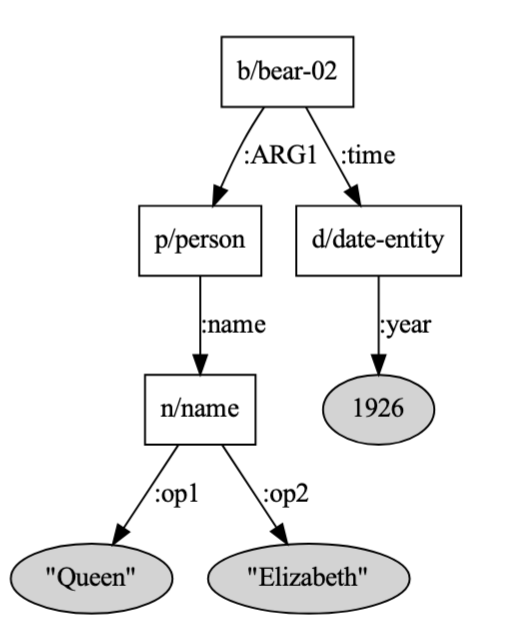</center>

The same graph can be represented in a serialised format called PENMAN format: 
```
(b / bear-02
    :ARG1 (p / person
        :name (n / name
            :op1 "Queen"
            :op2 "Elizabeth"))
    :time (d / date-entity
        :year 1926))
```

AMR graphs for bias-MapAIE are provided in the file `bias-MapAIE_penmans.amr`. It is text file containing, for each sentence:
- a line `::snt`, providing the original sentence in English;
- a line with the file number;
- the AMR graph in PENMAN format.

<font color="red">3.1 Question:</font> Explore the PropBank concepts used in the AMR graphs provided in `key_penmans.amr`. What concepts are used to represent the term _bias_? Which one of these concepts are actually part of PropBank (provide the link to the concept's frame for these)? Which ones are not part of PropBank? Where do these concept come from? 

1. **Parse the AMR graphs** to identify the concepts associated with "bias."
2. **Check which of these concepts are part of PropBank** (a lexical resource for verb semantics).
3. **Identify the origin of concepts not in PropBank** (e.g., custom frames, domain-specific extensions, or other resources like FrameNet).

#### 1. **Parse the AMR Graphs**
- AMR graphs are typically represented in a Penman notation format.
- We will parse the file to extract all instances of the term "bias" and their associated concepts (frames).

#### 2. **Identify PropBank Frames**
- PropBank frames are usually prefixed with a verb and a number (e.g., `argue.01`).
- We will check if the concepts associated with "bias" match any PropBank frames.

#### 3. **Check PropBank Online**
- For each candidate PropBank frame, we will check the [PropBank website](https://propbank.colorado.edu/) or the [FrameNet/PropBank browser](https://framenet2.icsi.berkeley.edu/fnReports/data/frameIndex.xml) to confirm its existence.

#### 4. **Identify Non-PropBank Concepts**
- Concepts not found in PropBank may come from:
  - **FrameNet** (for more general semantic frames)
  - **Custom extensions** (domain-specific or project-specific frames)
  - **Other resources** (e.g., VerbNet, NomBank)

In [14]:
!pip install requests


  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached charset_normalizer-3.4.3-cp311-cp311-win_amd64.whl.metadata (37 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.3-cp311-cp311-win_amd64.whl (107 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)

   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   --------------------------------

In [26]:
from penman import load
import logging
logging.getLogger().setLevel(logging.ERROR)
logging.getLogger("penman").setLevel(logging.ERROR)
logging.getLogger("penman.codec").setLevel(logging.ERROR)

amr_file = "mapaie/key_penmans.amr"

with open(amr_file, "r", encoding="utf-8") as f:
    amr_graphs = list(load(f))

# Extract concepts containing "bias"
bias_concepts = set()

for graph in amr_graphs:
    for triple in graph.triples:
        # triple = (source, relation, target)
        if triple[1] == ':instance' and triple[2] and 'bias' in triple[2].lower():
            bias_concepts.add(triple[2].lower())

bias_concepts = sorted(bias_concepts)
print(f"Concepts related to 'bias' in AMR: {bias_concepts}")

Concepts related to 'bias' in AMR: ['bias', 'bias-01']


“bias-01” → verb/adjective frame

“bias” → noun frame

In [ ]:
#distibution de bias et bias-01
concepts, counts = zip(bias_concepts)
plt.figure(figsize=(10, 6))
plt.bar(concepts, counts, color='skyblue')
plt.xlabel('Concepts liés au "bias"')
plt.ylabel('Fréquence')
plt.title('Distribution des concepts liés au "bias" dans les données AMR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
from penman import load
import logging
logging.getLogger().setLevel(logging.ERROR)
logging.getLogger("penman").setLevel(logging.ERROR)
logging.getLogger("penman.codec").setLevel(logging.ERROR)

amr_file = "bias-small.amr"

with open(amr_file, "r", encoding="utf-8") as f:
    amr_graphs = list(load(f))

# Extract concepts containing "bias"
bias_concepts = set()

for graph in amr_graphs:
    for triple in graph.triples:
        # triple = (source, relation, target)
        if triple[1] == ':instance' and triple[2] and 'bias' in triple[2].lower():
            bias_concepts.add(triple[2].lower())

bias_concepts = sorted(bias_concepts)
print(f"Concepts related to 'bias' in AMR: {bias_concepts}")

Concepts related to 'bias' in AMR: ['bias', 'bias-01']


<font color="orange">3.1 Answer:</font> 

AMR graphs give access to an abstraction of the semantic structure of the original sentences. Here, we are interested in the term _bias_, its semantic relations, and its semantic role in different contexts. In terms of AMR structure, we want to analyze the following elements:
- the position of the term _bias_ in the AMR graph (root/node/leaf);
- the parents (superior concepts) of the term _bias_;
- the siblings (concepts with the same parent) of the term _bias_;
- the children (inferior concepts) of the term _bias_;
- the relationships linking _bias_ to its parents and its children.

<font color="red">3.2 Question:</font> Explore the structure of the AMR graphs provided in `key_penmans.amr`. Please provide visualisations and comments for each of the explored elements.

For each AMR graph containing a concept like `bias` or `bias-01`, you want to explore:

| Element           | Meaning in AMR                                          | Example question                                                      |
| ----------------- | ------------------------------------------------------- | --------------------------------------------------------------------- |
| **Position**      | Whether `bias` is the root, an internal node, or a leaf | “Is the whole sentence about bias, or is bias a subordinate concept?” |
| **Parents**       | Which concept dominates `bias`                          | “What action or property is bias related to?”                         |
| **Siblings**      | Other concepts with the same parent                     | “Is bias contrasted with something?”                                  |
| **Children**      | Subconcepts or arguments of `bias`                      | “Who or what is biased?”                                              |
| **Relationships** | The roles connecting these nodes                        | “Is bias acting as ARG0, ARG1, :mod, etc.?”                           |

**Step 1: Load AMR graphs** — from your file using `penman.load`.

**Step 2: Find bias concepts** — any node where `:instance` → `bias` or `bias-01`.
**Step 3: For each bias node:**

* It checks if it’s a **root** (not appearing as a child).
* It finds **parents** (who connects *to* bias).
* It finds **children** (what *bias* connects *to*).
* It finds **siblings** (other nodes sharing the same parent).

**Step 4: Visualization**

* The AMR graph is converted into a `networkx` DiGraph.
* All “bias” nodes are highlighted in **orange**.
* Edge labels (roles like `:ARG0`, `:ARG1`) are displayed.


| Feature                     | Interpretation                                                                         |
| --------------------------- | -------------------------------------------------------------------------------------- |
| `is_root=False`             | Bias is not the main topic; it’s subordinate to another predicate.                     |
| `Parents=[('a', ':ARG1')]`  | Bias is the **ARG1** (object) of another predicate (so someone “has” or “shows” bias). |
| `Children=[(':ARG0', 'p')]` | Bias has an **ARG0**, probably the one who holds the bias.                             |
| `Siblings=['belief']`       | The parent also connects to “belief” — so “bias” and “belief” might co-occur.          |




In [33]:
from penman import load
import networkx as nx
import matplotlib.pyplot as plt

with open('mapaie/key_penmans.amr', 'r', encoding='utf-8') as f:
    amr_graphs = list(load(f))

def analyze_bias_structure(graph):
    """Return structure info for nodes related to bias or bias-01."""
    triples = graph.triples
    bias_nodes = [
        src
        for (src, rel, tgt) in triples
        if rel == ':instance' and tgt and 'bias' in tgt.lower()
    ]    
    structures = []
    for node in bias_nodes:
        parents = [(src, rel) for (src, rel, tgt) in triples if tgt == node]
        children = [(rel, tgt) for (src, rel, tgt) in triples if src == node and rel != ':instance']
        siblings = set()
        for (src, rel, tgt) in triples:
            if tgt == node:
                siblings.update([sib_tgt for (sib_src, sib_rel, sib_tgt) in triples if sib_src == src and sib_tgt != node])
        
        # Root detection
        all_targets = {t for (_, _, t) in triples}
        is_root = node not in all_targets
        
        structures.append({
            "node": node,
            "is_root": is_root,
            "parents": parents,
            "siblings": list(siblings),
            "children": children
        })
    return structures


for i, graph in enumerate(amr_graphs):
    structures = analyze_bias_structure(graph)
    if structures:
        print(f"\n--- Graph {i+1} ---")
        for s in structures:
            print(f"Node: {s['node']} (root={s['is_root']})")
            print(f"  Parents: {s['parents']}")
            print(f"  Siblings: {s['siblings']}")
            print(f"  Children: {s['children']}")



--- Graph 9 ---
Node: b (root=False)
  Parents: [('a3', ':op1')]
  Siblings: ['s', 'and', 'f', 'p3']
  Children: []

--- Graph 21 ---
Node: b (root=False)
  Parents: [('a2', ':op1')]
  Siblings: ['t2', 'and', 'f', 'o']
  Children: [(':polarity', '-')]

--- Graph 22 ---
Node: b (root=False)
  Parents: [('a2', ':op1')]
  Siblings: ['t2', 'and', 'h']
  Children: [(':polarity', '-')]

--- Graph 23 ---
Node: b (root=False)
  Parents: [('a2', ':op1')]
  Siblings: ['t2', 'and', 'f', 'o']
  Children: [(':polarity', '-')]

--- Graph 30 ---
Node: b (root=False)
  Parents: [('a4', ':ARG1')]
  Siblings: ['account-01', 'a2']
  Children: []
Node: b3 (root=False)
  Parents: [('m3', ':ARG1')]
  Siblings: ['mitigate-01']
  Children: []

--- Graph 36 ---
Node: b (root=False)
  Parents: [('c2', ':ARG1')]
  Siblings: ['complain-01']
  Children: []

--- Graph 39 ---
Node: b (root=False)
  Parents: [('s3', ':ARG1')]
  Siblings: ['t2', 'source-01']
  Children: [(':ARG1', 'd3')]

--- Graph 41 ---
Node: b (ro

In [34]:
from collections import Counter, defaultdict

summary = {
    "root_count": 0,
    "non_root_count": 0,
    "relations_to_bias": Counter(),
    "relations_from_bias": Counter(),
    "graphs_with_polarity": [],
}

for i, graph in enumerate(amr_graphs):
    triples = graph.triples
    bias_nodes = [src for (src, rel, tgt) in triples if rel == ":instance" and tgt and "bias" in tgt.lower()]
    for node in bias_nodes:
        # Root or not
        all_targets = {t for (_, _, t) in triples}
        if node not in all_targets:
            summary["root_count"] += 1
        else:
            summary["non_root_count"] += 1

        # Incoming and outgoing relations
        for src, rel, tgt in triples:
            if tgt == node:
                summary["relations_to_bias"][rel] += 1
            if src == node:
                summary["relations_from_bias"][rel] += 1
                if rel == ":polarity":
                    summary["graphs_with_polarity"].append(i+1)

# --- Print results ---
print("\n=== Summary of 'bias' structures ===")
print(f"Root occurrences: {summary['root_count']}")
print(f"Non-root occurrences: {summary['non_root_count']}")
print("\nRelations to 'bias' (parents):")
for rel, count in summary["relations_to_bias"].most_common():
    print(f"  {rel}: {count}")
print("\nRelations from 'bias' (children):")
for rel, count in summary["relations_from_bias"].most_common():
    print(f"  {rel}: {count}")
print(f"\nGraphs with polarity markers: {summary['graphs_with_polarity']}")



=== Summary of 'bias' structures ===
Root occurrences: 11
Non-root occurrences: 159

Relations to 'bias' (parents):
  :ARG1: 91
  :op1: 45
  :ARG0: 19
  :op2: 17
  :ARG2: 9
  :op3: 5
  :ARG3: 2
  :op4: 2
  :manner: 2
  :topic: 1
  :mod: 1
  :snt6: 1
  :op5: 1

Relations from 'bias' (children):
  :instance: 170
  :ARG1: 33
  :mod: 25
  :polarity: 7
  :ARG0: 7
  :ARG2: 4
  :example: 2
  :ARG3: 2
  :topic: 1
  :source: 1
  :poss: 1

Graphs with polarity markers: [21, 22, 23, 138, 177, 430, 733]


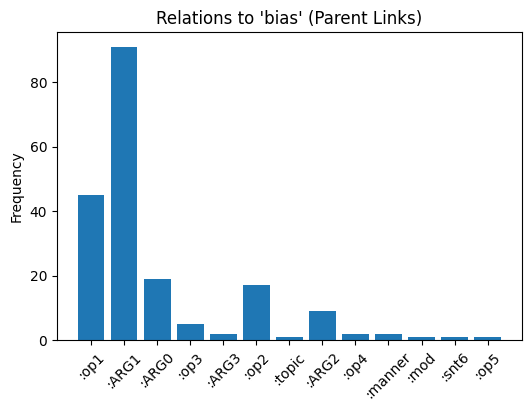

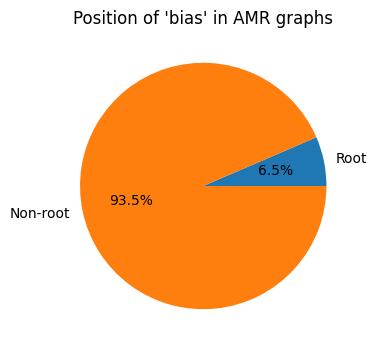

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for parent relations
plt.figure(figsize=(6,4))
plt.bar(summary["relations_to_bias"].keys(), summary["relations_to_bias"].values())
plt.title("Relations to 'bias' (Parent Links)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()



<font color="orange">3.2 Answer:</font> 

## Visualisation

https://github.com/Orange-OpenSource/metamorphosed